In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

seed = np.random.seed(0)

In [2]:
df = pd.read_csv("Credit.csv")

In [3]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
df.shape

(400, 11)

In [6]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


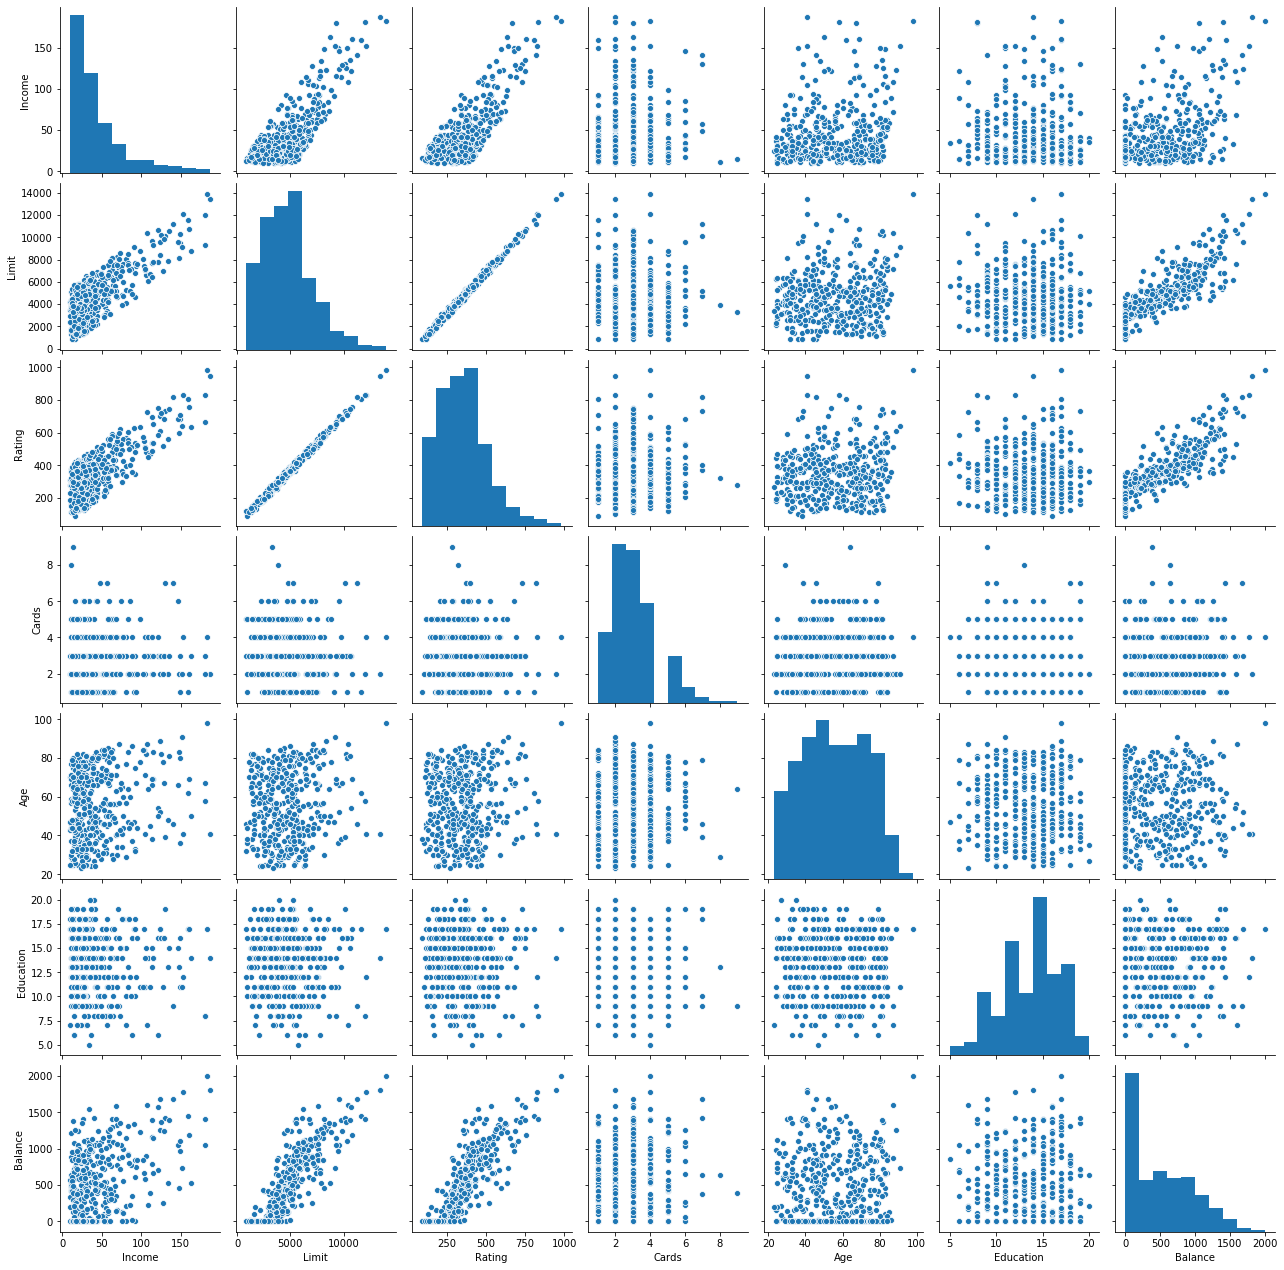

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


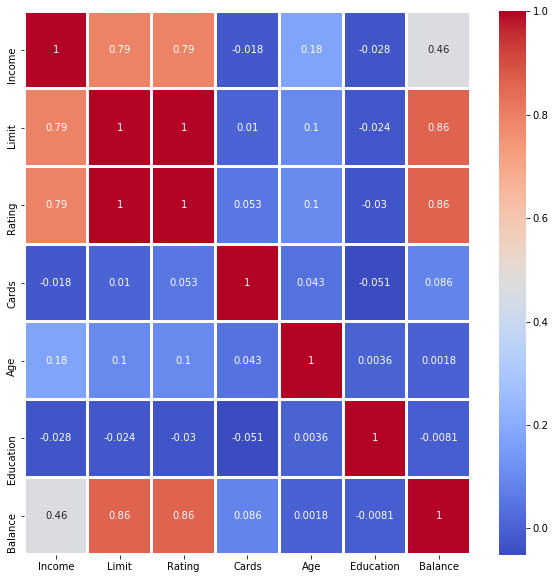

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, linewidths=2)
plt.show()

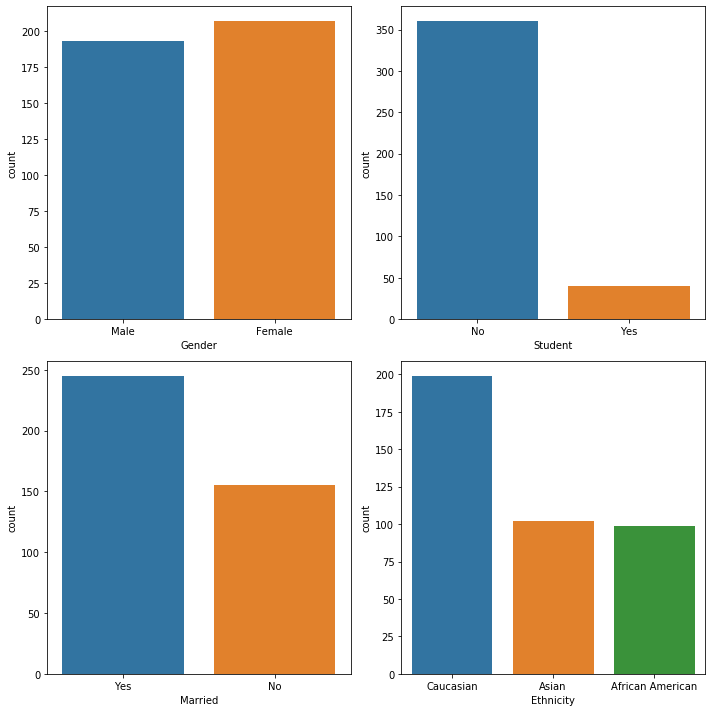

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x=df.Gender)
plt.subplot(2,2,2)
sns.countplot(x=df.Student)
plt.subplot(2,2,3)
sns.countplot(x=df.Married)
plt.subplot(2,2,4)
sns.countplot(x=df.Ethnicity)
plt.tight_layout()

In [11]:
df2 = pd.get_dummies(df,drop_first=True,columns=['Gender','Student','Married','Ethnicity'])

In [12]:
df2

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,1
1,106.025,6645,483,3,82,15,903,0,1,1,1,0
2,104.593,7075,514,4,71,11,580,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,1,0,1,0,1
396,13.364,3838,296,5,65,17,480,1,0,0,0,0
397,57.872,4171,321,5,67,12,138,0,0,1,0,1
398,37.728,2525,192,1,44,13,0,1,0,1,0,1


In [13]:
df2 = df2[['Income','Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Balance' ]]

In [14]:
df2

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Balance
0,14.891,3606,283,2,34,11,1,0,1,0,1,333
1,106.025,6645,483,3,82,15,0,1,1,1,0,903
2,104.593,7075,514,4,71,11,1,0,0,1,0,580
3,148.924,9504,681,3,36,11,0,0,0,1,0,964
4,55.882,4897,357,2,68,16,1,0,1,0,1,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,1,560
396,13.364,3838,296,5,65,17,1,0,0,0,0,480
397,57.872,4171,321,5,67,12,0,0,1,0,1,138
398,37.728,2525,192,1,44,13,1,0,1,0,1,0


In [15]:
X = df2.iloc[:,0:11]
y = df2.iloc[:,11]

In [16]:
X.values, y.values

(array([[1.48910e+01, 3.60600e+03, 2.83000e+02, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00],
        [1.06025e+02, 6.64500e+03, 4.83000e+02, ..., 1.00000e+00,
         1.00000e+00, 0.00000e+00],
        [1.04593e+02, 7.07500e+03, 5.14000e+02, ..., 0.00000e+00,
         1.00000e+00, 0.00000e+00],
        ...,
        [5.78720e+01, 4.17100e+03, 3.21000e+02, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00],
        [3.77280e+01, 2.52500e+03, 1.92000e+02, ..., 1.00000e+00,
         0.00000e+00, 1.00000e+00],
        [1.87010e+01, 5.52400e+03, 4.15000e+02, ..., 0.00000e+00,
         1.00000e+00, 0.00000e+00]]),
 array([ 333,  903,  580,  964,  331, 1151,  203,  872,  279, 1350, 1407,
           0,  204, 1081,  148,    0,    0,  368,  891, 1048,   89,  968,
           0,  411,    0,  671,  654,  467, 1809,  915,  863,    0,  526,
           0,    0,  419,  762, 1093,  531,  344,   50, 1155,  385,  976,
        1120,  997, 1241,  797,    0,  902,  654,  211,  607,  957,    0,
   

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [18]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed,n_estimators=400)

In [19]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=12)

[0]	validation_0-rmse:642.453
Will train until validation_0-rmse hasn't improved in 12 rounds.
[1]	validation_0-rmse:587.761
[2]	validation_0-rmse:539.285
[3]	validation_0-rmse:494.972
[4]	validation_0-rmse:455.392
[5]	validation_0-rmse:420.054
[6]	validation_0-rmse:389.69
[7]	validation_0-rmse:365.192
[8]	validation_0-rmse:340.388
[9]	validation_0-rmse:319.559
[10]	validation_0-rmse:298.729
[11]	validation_0-rmse:279.089
[12]	validation_0-rmse:262.207
[13]	validation_0-rmse:247.785
[14]	validation_0-rmse:235.732
[15]	validation_0-rmse:226.141
[16]	validation_0-rmse:216.941
[17]	validation_0-rmse:208.778
[18]	validation_0-rmse:201.985
[19]	validation_0-rmse:195.477
[20]	validation_0-rmse:189.62
[21]	validation_0-rmse:184.145
[22]	validation_0-rmse:179.957
[23]	validation_0-rmse:174.621
[24]	validation_0-rmse:169.591
[25]	validation_0-rmse:164.389
[26]	validation_0-rmse:160.445
[27]	validation_0-rmse:156.895
[28]	validation_0-rmse:153.203
[29]	validation_0-rmse:150.598
[30]	validation_0

[259]	validation_0-rmse:83.157
[260]	validation_0-rmse:83.17
[261]	validation_0-rmse:83.1391
[262]	validation_0-rmse:83.1188
[263]	validation_0-rmse:83.1187
[264]	validation_0-rmse:83.1292
[265]	validation_0-rmse:83.1257
[266]	validation_0-rmse:83.0869
[267]	validation_0-rmse:83.0937
[268]	validation_0-rmse:83.0849
[269]	validation_0-rmse:83.0803
[270]	validation_0-rmse:83.0549
[271]	validation_0-rmse:83.0477
[272]	validation_0-rmse:83.0143
[273]	validation_0-rmse:82.9579
[274]	validation_0-rmse:82.9247
[275]	validation_0-rmse:82.9458
[276]	validation_0-rmse:82.9737
[277]	validation_0-rmse:82.9867
[278]	validation_0-rmse:82.9631
[279]	validation_0-rmse:82.9411
[280]	validation_0-rmse:82.9655
[281]	validation_0-rmse:82.9788
[282]	validation_0-rmse:82.9514
[283]	validation_0-rmse:82.9268
[284]	validation_0-rmse:82.8989
[285]	validation_0-rmse:82.8345
[286]	validation_0-rmse:82.8272
[287]	validation_0-rmse:82.828
[288]	validation_0-rmse:82.7941
[289]	validation_0-rmse:82.7511
[290]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [20]:
y_pred = xgbmodel.predict(X_test)

In [21]:
y_pred

array([ 900.90344  ,  889.17316  ,  452.31537  ,  809.0772   ,
        217.58511  ,  667.9045   ,   14.705325 , 1000.7465   ,
        672.5366   ,  699.83685  ,  973.97235  ,  862.9884   ,
        902.9918   ,   -9.134166 ,  263.3883   ,  562.0055   ,
       1483.4188   , 1220.0475   ,   16.303608 ,  532.6451   ,
        100.14118  ,   -3.7286353,   -2.9272847,  594.53595  ,
         -2.349969 ,  849.1227   ,  505.3565   ,    8.04091  ,
         41.860203 , 1434.32     ,   -5.100351 ,  429.8814   ,
        547.86475  , 1010.781    ,  623.4839   ,  418.4779   ,
        974.4834   ,  619.32587  , 1148.7219   ,  944.5838   ,
        186.52888  ,  257.09525  ,  136.57278  ,  943.60016  ,
        138.91977  ,    5.2306824,  618.68115  ,   87.13952  ,
        778.9875   ,    5.06704  ,    1.9393628,  128.77113  ,
         -7.8309307,  250.80981  ,  557.27795  ,    5.7162194,
        778.7711   , 1272.8951   ,  532.98334  ,  965.7603   ,
        933.6377   ,  562.8463   ,  400.90082  ,  510.3

In [22]:
np.array(y_test)

array([ 912,  885,  426,  749,  199,  631,    0, 1050,  605,  681, 1093,
        835,  768,    0,  204,  531, 1677, 1425,    0,  571,    0,    0,
          0,  633,    0,  843,  391,    0,    0, 1587,    0,  414,  594,
       1075,  602,  532, 1023,  724, 1237,  966,  298,  265,  203,  903,
        188,    0,  588,  118,  653,    0,    0,   68,    0,  283,  541,
          0,  607, 1407,  654,  997,  945,  728,  331,  413, 1687,    0,
        642, 1151,    0, 1036,  872,  345,  822,   89,    0,  148,  578,
        905,  382,  846], dtype=int64)

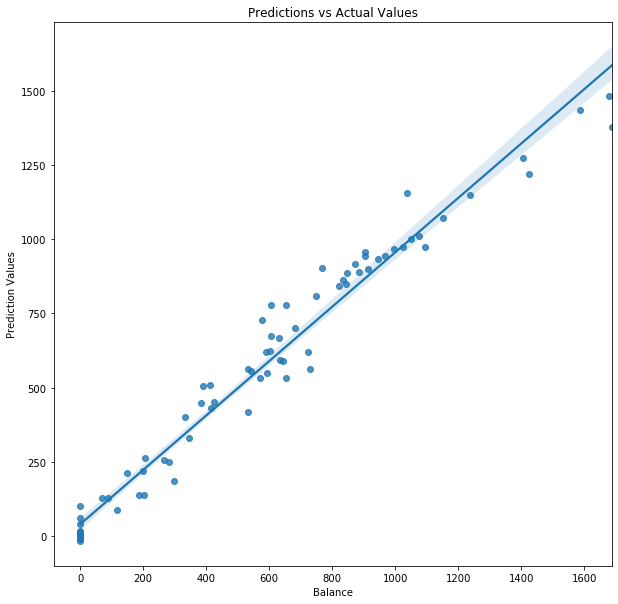

In [23]:
plt.subplots(figsize=(10,10))
plt.title("Predictions vs Actual Values")
plt.ylabel("Prediction Values")
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [24]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is",mse)

Mean Squared Error is 6695.768963185718


In [25]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 81.82767846630942


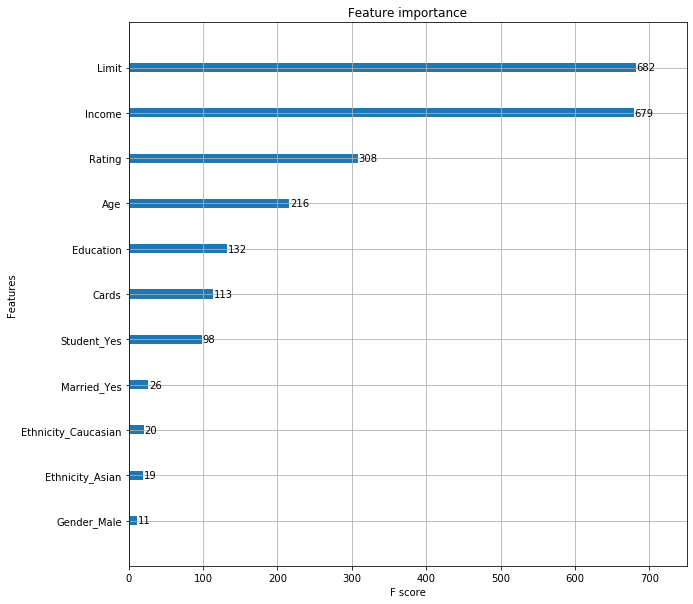

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

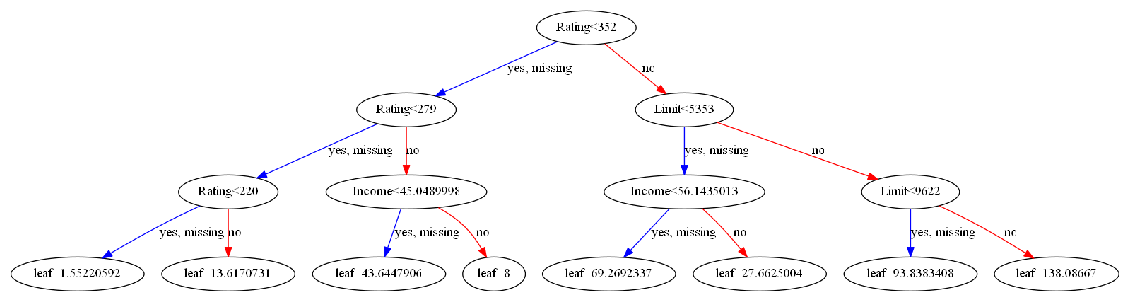

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

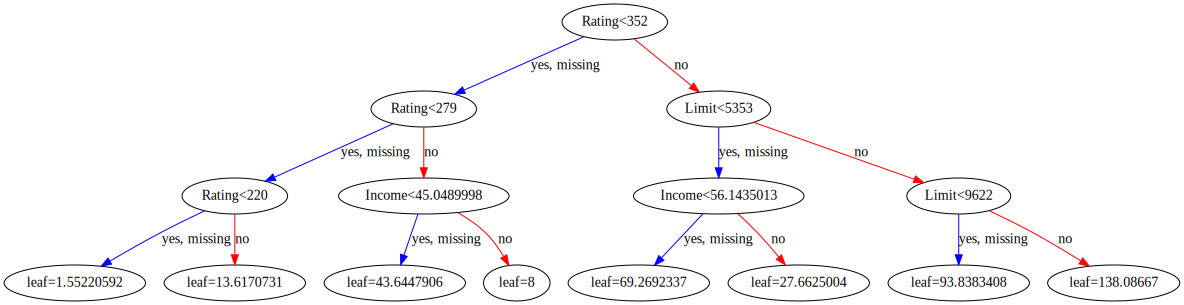

In [28]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)